# Random Forest on Titanic Dataset


# New Section

In [1]:
# Basic Utilities
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# For Label Encoding
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
import seaborn as sns

# For Printing Accuracy of our prediction
from sklearn.metrics import accuracy_score
# For Importing the Random Forest Classifier 
from sklearn.ensemble import RandomForestClassifier

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Now We will import our data

In [0]:
train = pd.read_csv("train.csv")
survived = pd.read_csv("gender_submission.csv")
test = pd.read_csv("test.csv")


After importing the next Step is pre processing
we will pre process in the following order

In [3]:
# Pre Processing

#Checking for NULL values
print(train.info())
#print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [0]:
'''
Age            714 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
They have missing values

'''
# We replace the Null values with mean of the particualr column
train = train.fillna(train.median())
test = test.fillna(test.median())
# basically, fill ages with mean of all ages


In [5]:
'''
# Label Encoding

source -> https://www.geeksforgeeks.org/ml-label-encoding-of-datasets-in-python/
As we know computer can only understand numbers and not strings.
so sex like 'male' and 'female' would be hard for the computer to decide

hence we will change it into features 
the numbering depends upon which features comes first
1- male
0- female
'''
print(train['Sex'].unique()) 
train['Sex']= label_encoder.fit_transform(train['Sex']) 
print(train['Sex'].unique())
test['Sex']= label_encoder.fit_transform(test['Sex']) 

['male' 'female']
[1 0]


In [0]:
train = train.fillna({"Embarked": "Q"})
embark_convert = {"S": 1, "C": 2, "Q": 3}
train['Embarked'] = train['Embarked'].map(embark_convert)
test['Embarked'] = test['Embarked'].map(embark_convert)

Visualizing each feature wrt to anonther

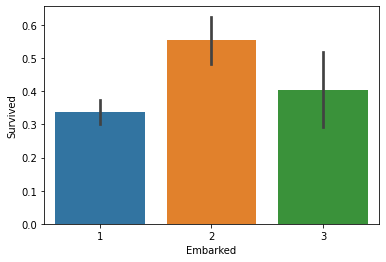

In [7]:
sns.barplot(x='Embarked',y='Survived',data=train)

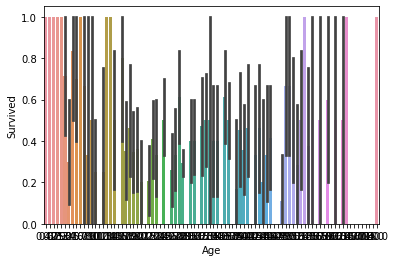

In [8]:
sns.barplot(x='Age',y='Survived',data=train)

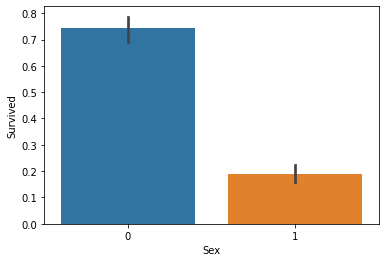

In [9]:
sns.barplot(x='Sex',y='Survived',data=train)

In [11]:
'''
Feature Selection

Deciding what all features to be used in our datset.

'''
print("Original features:")
print(train.columns)


Original features:
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [0]:
'''
Lets removing features we don't want
# Backward Selection

'''
#Name
train.drop(columns=["Name"],inplace= True)
test.drop(columns=["Name"],inplace=True)

#Ticket
train.drop(columns=["Ticket"],inplace= True)
test.drop(columns=["Ticket"],inplace=True)

#Cabin
train.drop(columns=["Cabin"],inplace= True)
test.drop(columns=["Cabin"],inplace=True)

#Parch
train.drop(columns=["Parch"],inplace= True)
test.drop(columns=["Parch"],inplace=True)

#Passenger Id
train.drop(columns=["PassengerId"],inplace= True)
test.drop(columns=["PassengerId"],inplace=True)

#SibSp
train.drop(columns=["SibSp"],inplace= True)
test.drop(columns=["SibSp"],inplace=True)


In [13]:
print(train.columns)
print(test.columns)


Index(['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked'], dtype='object')
Index(['Pclass', 'Sex', 'Age', 'Fare', 'Embarked'], dtype='object')


In [14]:
'''
Now Let's Split our Data base into
train - all the featues of our traing dataset
train_result - traing dataset result
test - all the features of our testing dataset
test_original - original result for testing accuracy
test_prediction - our predicted result
'''

train_result = train["Survived"]
train.drop(columns=["Survived"],inplace= True)
print("Traing Features:")
print(train.columns)
print("Testing Features:")
print(test.columns)
test_original = survived["Survived"].to_numpy()


Traing Features:
Index(['Pclass', 'Sex', 'Age', 'Fare', 'Embarked'], dtype='object')
Testing Features:
Index(['Pclass', 'Sex', 'Age', 'Fare', 'Embarked'], dtype='object')


Now our Actual Implementation

In [0]:
''' 
Creating a model using RandomForestClassifier library
'''
model = RandomForestClassifier(n_jobs=2, random_state=3)
# Don't ask me what those parameters does....study theory for details


In [16]:
# Traing our Model
# To train our model we will give it the training features 
# with correct answers
# More of like teaching a student by showing him images that the image is cat or dog
model.fit(train, train_result)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=2,
                       oob_score=False, random_state=3, verbose=0,
                       warm_start=False)

In [0]:
# Getting Predictions
# take a suprise test by showing it new features which it was'nt trained upon
# and asking our model what he thinks those features mean
test_predict=model.predict(test)

In [18]:
print(test_predict)

[0 0 0 1 1 0 0 0 1 0 0 0 1 0 1 1 0 1 1 0 0 0 1 1 1 0 1 1 1 0 0 0 1 0 0 0 1
 0 0 1 0 1 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 0 1 0 0 1 1 0 0 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 1 1 1 0 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 0
 1 1 0 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 1 0 1 0 0 1 0 0 1 0 1 0 1 1 1 1 0 0 1 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 1 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 1 1 0 0 1 0 0 0 1 0 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0
 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 1 1 1 1 0 0 0 1 1
 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 0 0 1 0 0 0]


In [19]:
# Comparing Accuracy
print("Accuracy:",accuracy_score(test_predict,test_original)*100)
print("Error Rate",100-(accuracy_score(test_predict,test_original)*100))


Accuracy: 83.97129186602871
Error Rate 16.028708133971293


In [20]:
# Comparing output side by side
view = 10
for x in range(view):
    l=""
    if test_predict[x] != survived["Survived"].iloc[x]:
        l="False"

    print(survived["PassengerId"].iloc[x],test_predict[x] ,survived["Survived"].iloc[x],' - ',l)

892 0 0  -  
893 0 1  -  False
894 0 0  -  
895 1 0  -  False
896 1 1  -  
897 0 0  -  
898 0 1  -  False
899 0 0  -  
900 1 1  -  
901 0 0  -  
